In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

import pandas as pd

target = 'popularity'

features =  ['valence',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo']
data_path = "../data/decades_new/data_from_"

In [18]:
best_options = { "val" :  0.7354724934405781,  "ests" : 166,  "crit" : "gini", "depth" :  10 }

decades = [str(i) for i in range(0,100,10)]
decade_imps = {}
for decade in decades:    
    df = pd.read_csv(data_path + decade + "s.csv")
    
    X = df[features]
    y = df[target]

    forest_classifier = RandomForestClassifier(n_estimators=best_options["ests"], max_depth=best_options["depth"], criterion=best_options["crit"]) 

    forest_classifier.fit(X, y)
    
    feature_classifier_importances_df = pd.DataFrame(
        {"feature": features, "importance": forest_classifier.feature_importances_}
    ).sort_values("importance", ascending=False)
    
    decade_imps[decade] = feature_classifier_importances_df


In [19]:
feature_imps = {}
for feature in features:
    temp = []
    for decade in decades:
        temp_df = decade_imps[decade]
        temp_df2 = temp_df[temp_df["feature"] == feature]
        temp.append(temp_df2["importance"].iloc[0])        
            
    feature_imps[feature] = temp

In [20]:
feature_imps

{'valence': [0.08629065317733865,
  0.07915040848377371,
  0.08777644663121006,
  0.05454223878465733,
  0.05995165422970765,
  0.06174653457469576,
  0.07907378500059073,
  0.08529621208388968,
  0.08772384242564693,
  0.0877297589572509],
 'acousticness': [0.0925488778831626,
  0.09224119987165971,
  0.13439868007191227,
  0.10109425825601966,
  0.09100414792860638,
  0.19367653548578403,
  0.09652963486290868,
  0.09311765493936128,
  0.09387366401068639,
  0.08791374626804747],
 'artists': [0.09141014872479339,
  0.07301879548634223,
  0.1825954692377573,
  0.2819654880573128,
  0.2287460785009986,
  0.12944100055433072,
  0.14578083058287794,
  0.08402084385803738,
  0.08599972649179559,
  0.09055490727413422],
 'danceability': [0.08611961712877576,
  0.09668517469981418,
  0.05892010834018693,
  0.07578047144801202,
  0.059956629148207305,
  0.07720144977620866,
  0.08077331508295368,
  0.09007035265671014,
  0.08821157667169936,
  0.08693147806793092],
 'duration_ms': [0.0972640

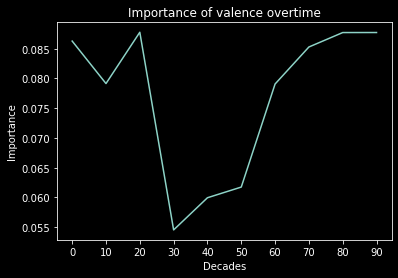

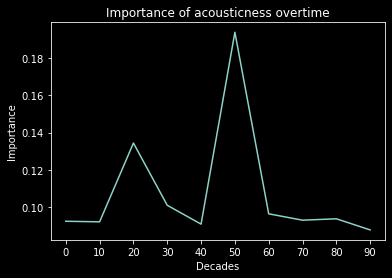

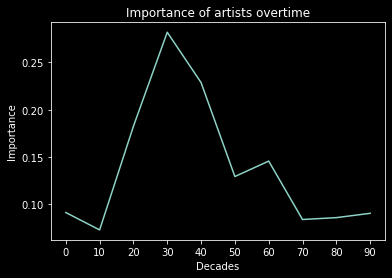

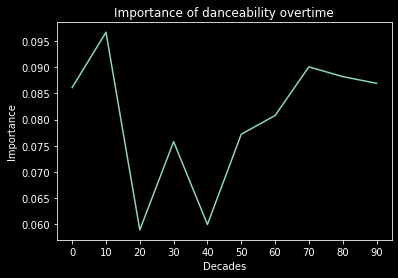

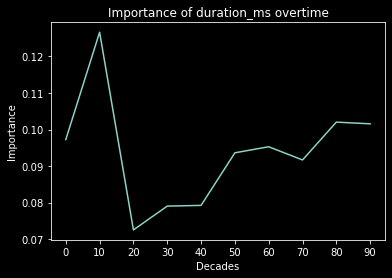

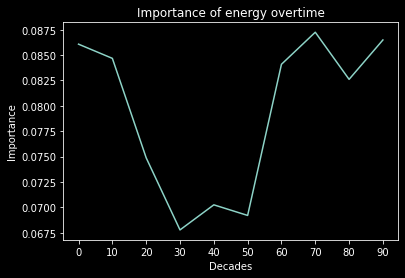

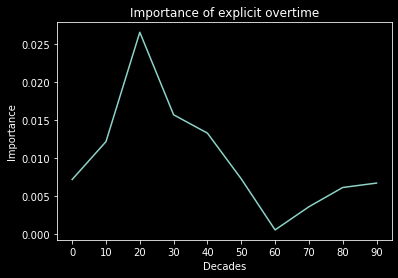

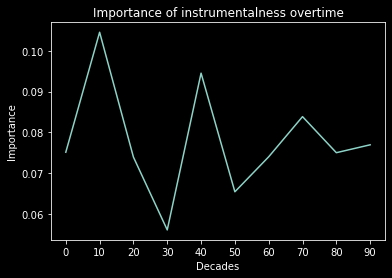

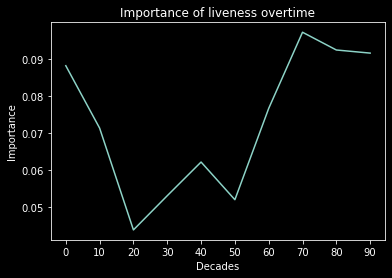

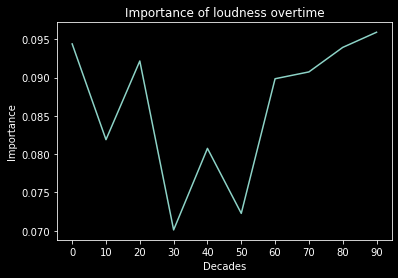

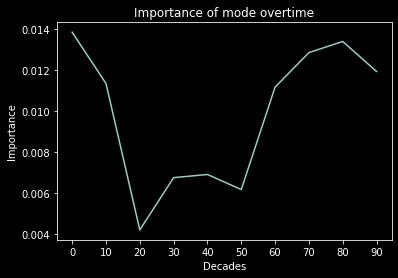

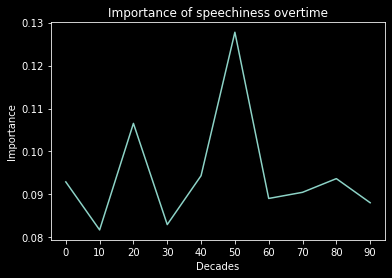

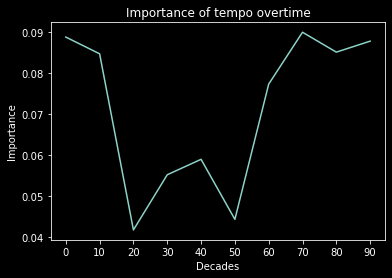

In [21]:
from matplotlib import style
style.use('dark_background')

for feature in features:
    plt.figure()
    plt.title(f"Importance of {feature} overtime")
    plt.xlabel("Decades")
    plt.ylabel("Importance")
    plt.plot(decades, feature_imps[feature])